<a href="https://colab.research.google.com/github/anirbansen2709/graph_ml_mutag_graph_classification/blob/main/Classification_of_Mutagenic_Chemicals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install networkx
!pip install dgl
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 30.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import torch

# Check for GPU
if torch.cuda.is_available():
    print('Default GPU Device : {}'.format(torch.cuda.get_device_name(0)))
    device = torch.device('cuda')
else:
    print('No GPU available')
    device = torch.device('cpu')
    
print(device)

Default GPU Device : Tesla T4
cuda


In [41]:
from sklearn.model_selection import train_test_split
import pandas as pd
import csv

### MUTAG Dataset

In genetics, a mutagen is a physical or chemical agent that changes the genetic material, usually DNA, of an organism and thus increases the frequency of mutations above the natural background level. As many mutations can cause cancer, mutagens are therefore also likely to be carcinogens, although not always necessarily so. All mutagens have characteristic mutational signatures with some chemicals becoming mutagenic through cellular processes.

**MUTAG** is a commonly used dataset for evaluating **graph classification algorithms**.

Each graph in the dataset represents a chemical compound and graph labels represent their mutagenic effect on a specific gram negative bacterium".

MUTAG is a dataset of 188 graphs - mutagenic aromatic and heteroaromatic nitro compounds. It has 18 nodes and 20 edges on average for each graph. Graph nodes 
have 7 labels (i.e. all molecules contain atoms of 7 possible elements) and  each graph is labelled as belonging to 1 of 2 classes.

We will run a graph classification task on this dataset using node information only.

In [5]:
import dgl
from dgl.data import DGLDataset

dataset = dgl.data.GINDataset('MUTAG', False)

Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


DGL backend not selected or invalid.  Assuming PyTorch for now.
Using backend: pytorch


Extracting file to /root/.dgl/GINDataset


In [6]:
print("Number of Node Features:", dataset.dim_nfeats)
print("Number of Node Classes:", dataset.nclasses)
print("Number of Graph Classes:", dataset.gclasses)
print("Total Number of Graphs:", len(dataset.labels))
print("Graph Labels:", dataset.labels)
print("Check first 5 graphs:", dataset.graphs[:5])

Number of Node Features: 7
Number of Node Classes: 7
Number of Graph Classes: 2
Total Number of Graphs: 188
Graph Labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
Check first 5 graphs: [Graph(num_nodes=23, num_edges=54,
      ndata_schemes={'label': Scheme(shape=(), dtype=torch.int64), 'attr': Scheme(shape=(7,), dtype=torch.float32)}
      edata_schemes={}), Graph(num_nodes=26, num_edges=56,
      ndata_schem

Mutagenic : False


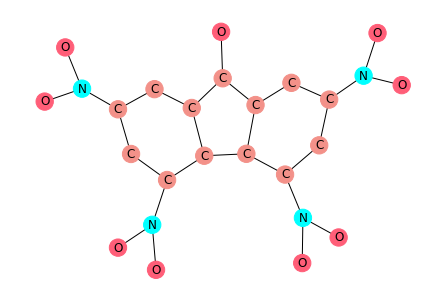

In [7]:
import networkx as nx

# Each node (atom) in the graph (molecule) is one of 7 types. The label information 
# can be found with graph.ndata["label"]
labels = {0: "C", 1: "N" , 2: "O", 3: "F", 4: "I", 5: "Cl", 6: "Br"}

# Define colors for the individual node classes
colors = {0: "#f39189", 1: "#00ffff" , 2: "#ff5e78", 3: "#ffc75f", 4: "#3a6351", 5: "#cdc733", 6: "#966c3b"}

# Try changing this to view different molecules
index = 1
g = dataset.graphs[index]
mutagenic_label = dataset.labels[index]

nx_g = g.to_networkx().to_undirected()
pos = nx.kamada_kawai_layout(nx_g)
node_labels = g.ndata['label']

g_labels = {i: labels[node_labels[i].item()] for i in range(g.num_nodes())}
nx.draw(nx_g, pos, labels=g_labels, with_labels=True, node_color=[colors[node_labels[i].item()] for i in range(g.num_nodes())])

print("Mutagenic : {}".format(True if mutagenic_label == 1 else False))

In [32]:
from sklearn.model_selection import train_test_split

map = [(x, y.item()) for x, y in zip([x for x in range(0, len(dataset.labels))], dataset.labels)]
df = pd.DataFrame(map, columns =['Index', 'Label'])
train, test = train_test_split(df, stratify = df.Label, )

train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

In [33]:
train_data_tuples = list(train.itertuples(index=False, name=None))

# Defining a data type for easy interface with training data. Just run the cell.
class MluMutagDataset(DGLDataset):
    def __init__(self, data_tuples):
        self.data = list()
        
        for index, label in data_tuples:
            self.data.append((dataset.graphs[index], label))
        
        self.len = len(data_tuples)
        
    def __getitem__(self, i):
        return self.data[i]
        
    def __len__(self):
        return self.len
    
train_val_set = MluMutagDataset(train_data_tuples)

In [34]:
#  Split train_val_set into training and validation sets
from dgl.data.utils import split_dataset

trainset, valset = split_dataset(train_val_set, [0.8, 0.2], shuffle=True, random_state=42)
print(len(trainset), len(valset))    # Verify that this is an 80-20 split

112 29


In [35]:
from dgl.dataloading import GraphDataLoader
trainloader = GraphDataLoader(   # Implement this
    trainset,
    batch_size=12,
    drop_last=False,
    shuffle=True)

valloader = GraphDataLoader(    # Implement this
    valset,
    batch_size=12,
    drop_last=False,
    shuffle=True)

In [36]:
import dgl.nn.pytorch as dglnn
import torch.nn as nn
import dgl.function as fn

class SimpleGCNClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(SimpleGCNClassifier, self).__init__()
        self.conv = dglnn.GraphConv(in_dim, hidden_dim)
        self.classify = nn.Sequential(nn.Linear(hidden_dim, 12),
                                      nn.Linear(12, n_classes))

    def forward(self, g, inputs):
        # Apply graph convolution and activation.
        h = F.relu(self.conv.forward(g, inputs))
        with g.local_scope():
            g.ndata['h'] = h
            
            # Calculate graph representation by average readout.
            hg = dgl.mean_nodes(g, 'h')    # Equivalent to dgl.readout_nodes(g, 'h', op='mean')
            return self.classify(hg)

In [37]:
import torch.nn.functional as F


# Only an example, 7 is the input feature size
model = SimpleGCNClassifier(7, 25, 2)        # Instantiate the model you defined above here. 
                                             # If you answered the questions in the hints, you
                                             # will immediately know what values to pass as arguments.
        
opt = torch.optim.Adam(model.parameters())   # Instantiate a predefined optimizer from torch.optim - this 
                                             # is the method that will be used to perform Gradient Descent.
                                             # We recommend using Adam.

for epoch in range(10):
    model.train()               # Set the model to train mode to allow gradients to be calculated
    cumulative_loss_train = 0.0 # Use this accumulate loss over an epoch and print it out at the end
                                # to get an estimate for how well your model is performing
    
    for batched_graph, labels in trainloader:
        features = batched_graph.ndata['attr']
        logits = model.forward(batched_graph, features) # Pass the features through the network to get logits
        loss = F.cross_entropy(logits, labels)  # Compute cross entropy loss. 
                                                # HINT : Use the loss functions defined within torch.nn.functional
        
        opt.zero_grad()         # Reset gradients for the next batch, since they accumulate by default
        loss.backward()         # Backprop
        opt.step()              # Update parameters
        
        cumulative_loss_train += loss.item()
    
    # Ideally you should see the cumulative loss decrease with each epoch
    print("Epoch: {}".format(epoch), cumulative_loss_train / len(trainloader))

Epoch: 0 0.7052957832813262
Epoch: 1 0.6746338784694672
Epoch: 2 0.6571440398693085
Epoch: 3 0.6312776803970337
Epoch: 4 0.6278996944427491
Epoch: 5 0.6115631401538849
Epoch: 6 0.6282592743635178
Epoch: 7 0.6157881140708923
Epoch: 8 0.6014562010765075
Epoch: 9 0.6137156248092651


In [38]:
with torch.no_grad():
    
    correct = 0
    model.eval()
    
    for batched_graph, labels in valloader:
        features = batched_graph.ndata['attr'] 
        logits = model.forward(batched_graph, features)    # This is the same as the training loop
        
        # Logits is a tensor comprising other tensors of 2 elements each. These 2 elements are indicative of (not
        # but not exactly equal to) the probability of the label 0 / 1 for the graph at that index.
        # The actual label for each graph will be equal to the index which has the maximum value among the 2 elements.
        # HINT : argmax
        _, predicted = torch.max(logits.data, 1)           
        
        print(predicted)    # It is recommended to keep this to verify if your training has worked 
                            # and the model is not simply predicting one label for every example.

        correct += (predicted == labels.data).sum().item()
    
    print(len(valset))
    acc = correct / len(valset)

print('Validation Accuracy: %f' % (acc*100))

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0])
29
Validation Accuracy: 58.620690


In [39]:
test_indices = test['Index'].tolist()
print(len(test_indices))

47


In [42]:
def write_to_file(predictions):
    with open('submission.csv','w') as out:
        csv_out = csv.writer(out)
        csv_out.writerow(['ID','Label'])
        for index, label in predictions:
            csv_out.writerow((index, label))
            

# Not using dataloader for graphs
with torch.no_grad():
    
    model.eval()
    predictions = []
    
    # Predict one at a time
    for index in test_indices:
        graph = dataset.graphs[index]
        features = graph.ndata['attr']
        output = model.forward(graph, features)
        _, predicted_labels = torch.max(output.data, 1)
        
        predictions.append((index, predicted_labels.item()))
        
    # Save to file
    write_to_file(predictions) 

print(len(predictions))
print(predictions)

47
[(110, 0), (155, 0), (106, 0), (160, 0), (63, 0), (122, 0), (86, 0), (82, 0), (0, 0), (34, 0), (14, 0), (173, 0), (147, 0), (52, 0), (107, 0), (12, 0), (168, 0), (77, 0), (162, 0), (100, 0), (31, 0), (39, 0), (177, 0), (131, 0), (23, 0), (65, 0), (19, 0), (172, 0), (33, 0), (129, 0), (78, 0), (45, 0), (2, 0), (114, 0), (184, 0), (57, 0), (74, 0), (32, 0), (22, 0), (130, 0), (149, 0), (119, 0), (98, 0), (138, 0), (29, 0), (135, 0), (175, 0)]
